In [48]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("üå´üõ∏")

üå´üõ∏


In [49]:
#Ï§ÄÎπÑÌïú Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞

import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/project/image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
plt.imshow(img_bgr)
plt.show()

In [50]:
#RGB Î≥ÄÍ≤Ω
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [51]:
#ÏñºÍµ¥ Í≤ÄÏ∂ú
#hog detector ÏÑ†Ïñ∏
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector ÏÑ†Ïñ∏
print("üå´üõ∏")


üå´üõ∏


In [52]:
#bounding box Ï∂îÏ∂ú
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("üå´üõ∏")

üå´üõ∏


In [53]:
print(dlib_rects)   # Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

rectangles[[(210, 82) (339, 211)]]


In [54]:
#landmarkÎ™®Îç∏ Î∂àÎü¨Ïò§Í∏∞

import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [55]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


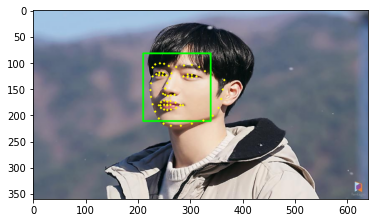

In [56]:
# ÎûúÎìúÎßàÌÅ¨ ÏòÅÏÉÅÏóê Ï∂úÎ†•ÌïòÍ∏∞

for landmark in list_landmarks:
    for idx, point in enumerate(landmark):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [57]:
#ÏΩî Ï¢åÌëú Ï∏°Ï†ï

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(252, 149)
(x,y) : (252,149)
(w,h) : (130,130)


In [58]:
#Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞

import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/project/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(130, 130, 3)


In [41]:
refined_x = x - w // 2  # left
refined_y = y - w // 2   # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (187,84)


In [59]:
if refined_y < 0 :
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0
    
print (img_sticker.shape)

(130, 130, 3)


In [60]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)


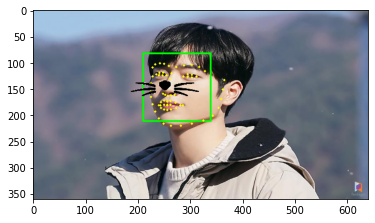

In [61]:
#Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [66]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

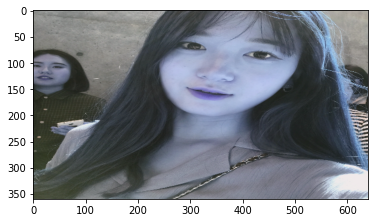

In [69]:
#Îã§ÏñëÌïú Í∞ÅÎèÑÏóêÏÑú ÏãúÎèÑÌï¥Î≥¥Í∏∞
#Ï§ÄÎπÑÌïú ÌöåÏ†Ñ Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞

import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/project/selfie.PNG'
img_bgr = cv2.imread(my_image_path)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
plt.imshow(img_bgr)
plt.show()

#RGB Î≥ÄÍ≤Ω
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


In [70]:
#ÏñºÍµ¥ Í≤ÄÏ∂ú
#hog detector ÏÑ†Ïñ∏
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector ÏÑ†Ïñ∏


#bounding box Ï∂îÏ∂ú
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)



rectangles[]


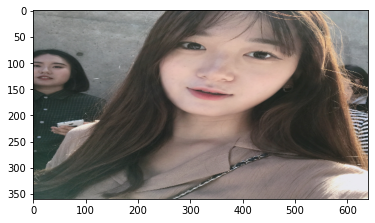

In [71]:
print(dlib_rects)   # Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
#Î¨∏Ï†úÏ†ê
# 1. ÏñºÍµ¥Í∞ÅÎèÑ , Í±∞Î¶¨
# Ïó¨Í∏∞ÏÑú Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌñàÎã§. Ïù¥ÏÇ¨ÏßÑ Ïù¥Ïô∏ÏóêÎèÑ Îã§Î•∏ Ïó¨Îü¨ Í∞ÅÎèÑÏùò ÏÇ¨ÏßÑÎì§ÏùÑ ÏãúÎèÑÌï¥ Î≥¥ÏïòÎäîÎç∞, Ï∂©Î∂ÑÌïú Ïó¨Î∞±Ïù¥ÎÇò Ï†ïÌôïÌïú Ï†ïÎ©¥ ÏñºÍµ¥Ïù¥ ÏïÑÎãàÎ©¥, rectangular ÏòÅÏó≠Ïù¥ ÏûòÏ∏°Ï†ïÎêòÏßÄ ÏïäÏïòÎã§.

# Ïã§Ìñâ ÏÜçÎèÑ ÎòêÌïú Ï§ëÏöîÌï† Í≤ÉÏù¥Îã§. ÏòÅÏÉÅÏóê Ïä§Ìã∞Ïª§Î•º Î∂ÄÏ∞©Ìï† Í≤ΩÏö∞, Ïã§ÏãúÍ∞ÑÏúºÎ°ú Ïù¥ÎèôÌïòÎäî ÏñºÍµ¥ Ï¢åÌëúÎ•º Îπ†Î•¥Í≤å Ïó∞ÏÇ∞Ìï¥Ïïº Ìï† Í≤ÉÏù¥Îùº ÏÉùÍ∞ÅÌïúÎã§.
# Ï†ïÌôïÎèÑ Î∂ÄÎ∂ÑÏóê ÏûàÏñ¥ÏÑúÎäî, ÎåÄÎûµÏ†ÅÏúºÎ°ú Ïä§Ìã∞Ïª§Í∞Ä ÎÜìÏùº Í∏∞Ï§ÄÏ†êÎßå Ïûò ÏÑ§Ï†ïÌïúÎã§Î©¥ Ïä§Ìã∞Ïª§ Ïï±ÏùÑ ÎßåÎì§ Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§.